## October 5 Notes
### Chapter 8: More on Functions

In [1]:
function fact(n::Integer)
    n==0?1:n*fact(n-1)
end

fact (generic function with 1 method)

In [2]:
fact(8)

40320

In [3]:
fact(8.5)

LoadError: LoadError: MethodError: no method matching fact(::Float64)
Closest candidates are:
  fact(!Matched::Integer) at In[1]:2
while loading In[3], in expression starting on line 1

Adding condition so that you cannot input a negative number

In [4]:
function fact(n::Integer)
    n >= 0 || throw(ArgumentError("Nooooooo! Must not be a negative integer!"))
    n==0?1:n*fact(n-1)
end

fact (generic function with 1 method)

In [5]:
fact(-2)

LoadError: LoadError: ArgumentError: Nooooooo! Must not be a negative integer!
while loading In[5], in expression starting on line 1

### Optional Arguments

In [6]:
function newton(f::Function, df::Function, x0::Number, maxsteps::Number=100, stopping::Number=1e-6)
    x1=x0
    x2=x0+1
    steps=0
    while(abs(x2-x1)>stopping && steps<maxsteps)
        x1=x2
        x2=x1-f(x1)/df(x1)
        println(x2)
        steps+=1
    end
    x2
end

newton (generic function with 3 methods)

In [7]:
newton(x->x^2-65,x->2x,10)

8.454545454545455
8.071358748778104
8.06226287929398
8.062257748300183
8.06225774829855


8.06225774829855

In [8]:
newton(x->x^2-65,x->2x,10,3)

8.454545454545455
8.071358748778104
8.06226287929398


8.06226287929398

Check that the new arguments are valid

In [9]:
function newton(f::Function, df::Function, x0::Number, maxsteps::Number=100, stopping::Number=1e-6)
    maxsteps > 0 || throw(ArgumentError("GAH! MaxSteps cannot be <= 0. Must be 1 or greater."))
    1 > stopping > 0 || throw(ArgumentError("ERR: Stop must be between 0 and 1"))
    x1 = x0
    x2 = x0+1
    steps = 0
    while(abs(x2-x1) > stopping && steps < maxsteps)
        x1 = x2
        x2 = x1 - f(x1)/df(x1)
        steps += 1
    end
    x2
end

newton (generic function with 3 methods)

In [10]:
newton(x->x^2-65,x->2x,10,5,1)

LoadError: LoadError: ArgumentError: ERR: Stop must be between 0 and 1
while loading In[10], in expression starting on line 1

If steps exceeds maxsteps, throw and exception error

In [11]:
newton(x->x^2+1,x->2x,1)

1.8938359948608365

In [12]:
function newton(f::Function, df::Function, x0::Number, maxsteps::Number=100, stopping::Number=1e-6)
    maxsteps > 0 || throw(ArgumentError("GAH! MaxSteps cannot be <= 0. Must be 1 or greater."))
    1 > stopping > 0 || throw(ArgumentError("ERR: Stop must be between 0 and 1"))
    x1 = x0
    x2 = x0+1
    steps = 0
    while(abs(x2-x1) > stopping && steps < maxsteps)
        x1 = x2
        x2 = x1 - f(x1)/df(x1)
        steps += 1
    end
    if (steps == maxsteps)
        throw(ErrorException("You have reached the max number of steps"))
    end
    x2
end

newton (generic function with 3 methods)

In [13]:
newton(x->x^2+1,x->2x,1)

LoadError: LoadError: You have reached the max number of steps
while loading In[13], in expression starting on line 1

In [14]:
newton(x->x^2-65,x->2x,1;stopping=1e-12)

LoadError: LoadError: function newton does not accept keyword arguments
while loading In[14], in expression starting on line 1

### Variable number of arguments

In [15]:
function geom_mean(x::Number...)
    prod(x)^(1/length(x))
end

geom_mean (generic function with 1 method)

In [16]:
geom_mean(100,99,98,87,100,77,92,100,97)

94.1270687621155

### Multiple Dispatch of Functions

In [17]:
methods(+)

# 163 methods for generic function "+":
+(x::Bool, z::Complex{Bool}) at complex.jl:136
+(x::Bool, y::Bool) at bool.jl:48
+(x::Bool) at bool.jl:45
+{T<:AbstractFloat}(x::Bool, y::T) at bool.jl:55
+(x::Bool, z::Complex) at complex.jl:143
+(x::Bool, A::AbstractArray{Bool,N<:Any}) at arraymath.jl:91
+(x::Float32, y::Float32) at float.jl:239
+(x::Float64, y::Float64) at float.jl:240
+(z::Complex{Bool}, x::Bool) at complex.jl:137
+(z::Complex{Bool}, x::Real) at complex.jl:151
+(a::Float16, b::Float16) at float16.jl:136
+(x::Char, y::Integer) at char.jl:40
+(c::BigInt, x::BigFloat) at mpfr.jl:240
+(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) at gmp.jl:298
+(a::BigInt, b::BigInt, c::BigInt, d::BigInt) at gmp.jl:291
+(a::BigInt, b::BigInt, c::BigInt) at gmp.jl:285
+(x::BigInt, y::BigInt) at gmp.jl:255
+(x::BigInt, c::Union{UInt16,UInt32,UInt64,UInt8}) at gmp.jl:310
+(x::BigInt, c::Union{Int16,Int32,Int64,Int8}) at gmp.jl:326
+(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) at mpfr.jl:388
+(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) at mpfr.jl:381
+(a::BigFloat, b::BigFloat, c::BigFloat) at mpfr.jl:375
+(x::BigFloat, c::BigInt) at mpfr.jl:236
+(x::BigFloat, y::BigFloat) at mpfr.jl:205
+(x::BigFloat, c::Union{UInt16,UInt32,UInt64,UInt8}) at mpfr.jl:212
+(x::BigFloat, c::Union{Int16,Int32,Int64,Int8}) at mpfr.jl:220
+(x::BigFloat, c::Union{Float16,Float32,Float64}) at mpfr.jl:228
+{T}(B::BitArray{2}, J::UniformScaling{T}) at linalg/uniformscaling.jl:38
+(a::Base.Pkg.Resolve.VersionWeights.VWPreBuildItem, b::Base.Pkg.Resolve.VersionWeights.VWPreBuildItem) at pkg/resolve/versionweight.jl:85
+(a::Base.Pkg.Resolve.VersionWeights.VWPreBuild, b::Base.Pkg.Resolve.VersionWeights.VWPreBuild) at pkg/resolve/versionweight.jl:131
+(a::Base.Pkg.Resolve.VersionWeights.VersionWeight, b::Base.Pkg.Resolve.VersionWeights.VersionWeight) at pkg/resolve/versionweight.jl:185
+(a::Base.Pkg.Resolve.MaxSum.FieldValues.FieldValue, b::Base.Pkg.Resolve.MaxSum.FieldValues.FieldValue) at pkg/resolve/fieldvalue.jl:44
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.CompoundPeriod) at dates/periods.jl:314
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.Period) at dates/periods.jl:312
+(x::Base.Dates.CompoundPeriod, y::Base.Dates.TimeType) at dates/periods.jl:359
+(dt::DateTime, z::Base.Dates.Month) at dates/arithmetic.jl:37
+(dt::DateTime, y::Base.Dates.Year) at dates/arithmetic.jl:13
+(x::DateTime, y::Base.Dates.Period) at dates/arithmetic.jl:64
+(x::Date, y::Base.Dates.Day) at dates/arithmetic.jl:62
+(x::Date, y::Base.Dates.Week) at dates/arithmetic.jl:60
+(dt::Date, z::Base.Dates.Month) at dates/arithmetic.jl:43
+(dt::Date, y::Base.Dates.Year) at dates/arithmetic.jl:17
+(y::AbstractFloat, x::Bool) at bool.jl:57
+{T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(x::T, y::T) at int.jl:32
+(x::Integer, y::Ptr) at pointer.jl:108
+(z::Complex, w::Complex) at complex.jl:125
+(z::Complex, x::Bool) at complex.jl:144
+(x::Real, z::Complex{Bool}) at complex.jl:150
+(x::Real, z::Complex) at complex.jl:162
+(z::Complex, x::Real) at complex.jl:163
+(x::Rational, y::Rational) at rational.jl:199
+(x::Integer, y::Char) at char.jl:41
+{N}(i::Integer, index::CartesianIndex{N}) at multidimensional.jl:58
+(c::Union{UInt16,UInt32,UInt64,UInt8}, x::BigInt) at gmp.jl:314
+(c::Union{Int16,Int32,Int64,Int8}, x::BigInt) at gmp.jl:327
+(c::Union{UInt16,UInt32,UInt64,UInt8}, x::BigFloat) at mpfr.jl:216
+(c::Union{Int16,Int32,Int64,Int8}, x::BigFloat) at mpfr.jl:224
+(c::Union{Float16,Float32,Float64}, x::BigFloat) at mpfr.jl:232
+(x::Irrational, y::Irrational) at irrationals.jl:88
+(x::Number) at operators.jl:115
+{T<:Number}(x::T, y::T) at promotion.jl:255
+(x::Number, y::Number) at promotion.jl:190
+(r1::OrdinalRange, r2::OrdinalRange) at operators.jl:505
+{T<:AbstractFloat}(r1::FloatRange{T}, r2::FloatRange{T}) at operators.jl:512
+{T<:AbstractFloat}(r1::LinSpace{T}, r2::LinSpace{T}) at operators.jl:531
+(r1::Union{FloatRange,LinSpa

In [18]:
methods(*)

# 149 methods for generic function "*":
*(x::Bool, z::Complex{Bool}) at complex.jl:140
*(x::Bool, y::Bool) at bool.jl:50
*{T<:Unsigned}(x::Bool, y::T) at bool.jl:63
*(x::Bool, z::Complex) at complex.jl:147
*(x::Bool, y::Irrational) at irrationals.jl:90
*{T<:Number}(x::Bool, y::T) at bool.jl:60
*(x::Float32, y::Float32) at float.jl:243
*(x::Float64, y::Float64) at float.jl:244
*(z::Complex{Bool}, x::Bool) at complex.jl:141
*(z::Complex{Bool}, x::Real) at complex.jl:159
*(a::Float16, b::Float16) at float16.jl:136
*(this::Base.Grisu.Float, other::Base.Grisu.Float) at grisu/float.jl:138
*(c::BigInt, x::BigFloat) at mpfr.jl:240
*(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) at gmp.jl:298
*(a::BigInt, b::BigInt, c::BigInt, d::BigInt) at gmp.jl:291
*(a::BigInt, b::BigInt, c::BigInt) at gmp.jl:285
*(x::BigInt, y::BigInt) at gmp.jl:255
*(x::BigInt, c::Union{UInt16,UInt32,UInt64,UInt8}) at gmp.jl:332
*(x::BigInt, c::Union{Int16,Int32,Int64,Int8}) at gmp.jl:338
*(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) at mpfr.jl:388
*(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) at mpfr.jl:381
*(a::BigFloat, b::BigFloat, c::BigFloat) at mpfr.jl:375
*(x::BigFloat, c::BigInt) at mpfr.jl:236
*(x::BigFloat, y::BigFloat) at mpfr.jl:205
*(x::BigFloat, c::Union{UInt16,UInt32,UInt64,UInt8}) at mpfr.jl:212
*(x::BigFloat, c::Union{Int16,Int32,Int64,Int8}) at mpfr.jl:220
*(x::BigFloat, c::Union{Float16,Float32,Float64}) at mpfr.jl:228
*(B::BitArray{2}, J::UniformScaling) at linalg/uniformscaling.jl:132
*(z::Complex, w::Complex) at complex.jl:127
*{T<:Union{Int128,UInt128}}(x::T, y::T) at int.jl:426
*{T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(x::T, y::T) at int.jl:33
*(z::Complex, x::Bool) at complex.jl:148
*(x::Real, z::Complex{Bool}) at complex.jl:158
*(x::Real, z::Complex) at complex.jl:170
*(z::Complex, x::Real) at complex.jl:171
*(x::Rational, y::Rational) at rational.jl:206
*{N}(a::Integer, index::CartesianIndex{N}) at multidimensional.jl:61
*(c::Union{UInt16,UInt32,UInt64,UInt8}, x::BigInt) at gmp.jl:336
*(c::Union{Int16,Int32,Int64,Int8}, x::BigInt) at gmp.jl:342
*(c::Union{UInt16,UInt32,UInt64,UInt8}, x::BigFloat) at mpfr.jl:216
*(c::Union{Int16,Int32,Int64,Int8}, x::BigFloat) at mpfr.jl:224
*(c::Union{Float16,Float32,Float64}, x::BigFloat) at mpfr.jl:232
*{T<:Number}(x::T, D::Diagonal) at linalg/diagonal.jl:113
*(x::Irrational, y::Irrational) at irrationals.jl:88
*(y::Real, x::Base.Dates.Period) at dates/periods.jl:90
*(x::Number) at operators.jl:116
*(y::Number, x::Bool) at bool.jl:65
*{T<:Number}(x::T, y::T) at promotion.jl:256
*(x::Number, y::Number) at promotion.jl:191
*{T<:Union{Complex{Float32},Complex{Float64},Float32,Float64},S}(A::Union{Base.ReshapedArray{T,2,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N<:Any}}},DenseArray{T,2},SubArray{T,2,A<:Union{Base.ReshapedArray{T<:Any,N<:Any,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N<:Any}}},DenseArray},I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex,Colon,Int64,Range{Int64}},N<:Any}},L<:Any}}, x::Union{Base.ReshapedArray{S,1,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N<:Any}}},DenseArray{S,1},SubArray{S,1,A<:Union{Base.ReshapedArray{T<:Any,N<:Any,A<:DenseArray,MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N<:Any}}},DenseArray},I<:Tuple{Vararg{Union{Base.AbstractCartesianIndex,Colon,Int64,Range{Int64}},N<:Any}},L<:Any}}) at linalg/matmul.jl:79
*(A::SymTridiagonal, B::Number) at linalg/tridiag.jl:98
*(A::Tridiagonal, B::Number) at linalg/tridiag.jl:496
*(A::UpperTriangular, x::Number) at linalg/triangular.jl:477
*(A::Base.LinAlg.UnitUpperTriangular, x::Number) at linalg/triangular.jl:480
*(A::LowerTriangular, x::Number) at linalg/triangular.jl:477
*(A::Base.LinAlg.UnitLowerTriangular, x::Number) at linalg/triangular.jl:480
*(A::Tridiagonal, B::Up

In [19]:
function the_max(x::Number,y::Number)
    x>y?x:y
end

the_max (generic function with 1 method)

In [20]:
function the_max(x::Number, y::Number, z::Number)
    temp=0
    if x>temp
        temp = x
    end
    if y>temp
        temp=y
    end
    if z>temp
        temp=z
    end
    temp    
end

function the_max(x::Number, y::Number, z::Number)
    x>y&&x>z?x:the_max(y,z) 
end

the_max (generic function with 2 methods)

In [21]:
function the_max(x::Number...)
    max = -Inf
    for num in x
        if num>max
            max=num
        end
    end
    max
end

the_max (generic function with 3 methods)

In [22]:
function the_max(arr::Array{Number,1})
    max = -Inf
    for num in arr
        if num>max
            max=num
        end
    end
    max
end

the_max (generic function with 4 methods)

In [23]:
methods(the_max)

# 4 methods for generic function "the_max":
the_max(arr::Array{Number,1}) at In[22]:2
the_max(x::Number, y::Number) at In[19]:2
the_max(x::Number, y::Number, z::Number) at In[20]:16
the_max(x::Number...) at In[21]:2

In [24]:
the_max(5,6)

6

In [25]:
the_max(-7,2,15)

15

In [26]:
the_max(1,2,3,4,5,1,2,3,9,8,234,33,125)

234

In [27]:
the_max([3,5,7,9])

LoadError: LoadError: MethodError: no method matching the_max(::Array{Int64,1})
Closest candidates are:
  the_max(!Matched::Array{Number,1}) at In[22]:2
  the_max(!Matched::Number, !Matched::Number) at In[19]:2
  the_max(!Matched::Number, !Matched::Number, !Matched::Number) at In[20]:16
  ...
while loading In[27], in expression starting on line 1

Max of a unit range

In [28]:
3:7

3:7

In [29]:
typeof(ans)

UnitRange{Int64}

In [30]:
collect(3:7)

5-element Array{Int64,1}:
 3
 4
 5
 6
 7

In [31]:
collect(3.0:0.5:6.5)

8-element Array{Float64,1}:
 3.0
 3.5
 4.0
 4.5
 5.0
 5.5
 6.0
 6.5

In [32]:
function the_max(r::UnitRange)
    last(r)
end

the_max (generic function with 5 methods)

In [33]:
function the_max(r::FloatRange)
    last(r)
end

the_max (generic function with 6 methods)

In [34]:
the_max(3.0:0.5:6.5)

6.5

### Chapter 9: Plots

In [35]:
using Gadfly

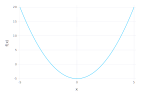

In [36]:
plot(x->x^2-5,-5,5)

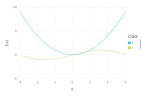

In [37]:
plot([x->x^2,sin],-3,3)

In [38]:
f(x)=1/(1+x^2)

f (generic function with 1 method)

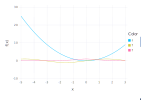

In [39]:
plot([x->x^2,sin,f],-5,3)

### Plotting Data

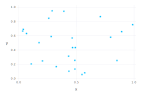

In [40]:
pts1=rand(25);
pts2=rand(25);
plot(x=pts1,y=pts2)

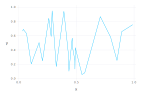

In [41]:
plot(x=pts1,y=pts2,Geom.line)

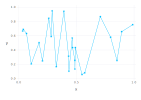

In [42]:
plot(x=pts1,y=pts2,Geom.line,Geom.point)

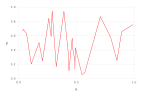

In [43]:
plot(x=pts1,y=pts2,Geom.line,Theme(default_color=colorant"red"))

In [44]:
dark_theme = Theme(
    panel_fill=colorant"black",
    default_color=colorant"red",
    line_width=3pt,
    default_point_size=3.5pt,
    lowlight_opacity=0.7
);

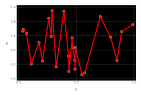

In [45]:
plot(x=pts1,y=pts2,Geom.line,Geom.point,dark_theme)

### RDatasets

In [46]:
using RDatasets

In [47]:
RDatasets.packages()

,Package,Title
1,COUNT,"Functions, data and code for count data."
2,Ecdat,Data sets for econometrics
3,HSAUR,A Handbook of Statistical Analyses Using R (1st Edition)
4,HistData,Data sets from the history of statistics and data visualization
5,ISLR,Data for An Introduction to Statistical Learning with Applications in R
6,KMsurv,"Data sets from Klein and Moeschberger (1997), Survival Analysis"
7,MASS,Support Functions and Datasets for Venables and Ripley's MASS
8,SASmixed,"Data sets from ""SAS System for Mixed Models"""
9,Zelig,Everyone's Statistical Software
10,adehabitatLT,Analysis of Animal Movements


In [48]:
RDatasets.datasets("datasets")

,Package,Dataset,Title,Rows,Columns
1,datasets,BOD,Biochemical Oxygen Demand,6,2
2,datasets,CO2,Carbon Dioxide Uptake in Grass Plants,84,5
3,datasets,Formaldehyde,Determination of Formaldehyde,6,2
4,datasets,HairEyeColor,Hair and Eye Color of Statistics Students,32,4
5,datasets,InsectSprays,Effectiveness of Insect Sprays,72,2
6,datasets,LifeCycleSavings,Intercountry Life-Cycle Savings Data,50,6
7,datasets,Loblolly,Growth of Loblolly pine trees,84,4
8,datasets,OrchardSprays,Potency of Orchard Sprays,64,4
9,datasets,PlantGrowth,Results from an Experiment on Plant Growth,30,2
10,datasets,Puromycin,Reaction Velocity of an Enzymatic Reaction,23,3


In [49]:
trees=RDatasets.dataset("datasets","trees")

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7
7,11.0,66,15.6
8,11.0,75,18.2
9,11.1,80,22.6
10,11.2,75,19.9


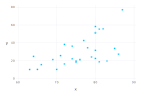

In [50]:
plot(x=trees[:,2],y=trees[:,3])

In [51]:
typeof(trees)

DataFrames.DataFrame

In [52]:
iris=RDatasets.dataset("datasets","iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


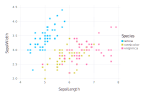

In [54]:
plot(iris,x="SepalLength",y="SepalWidth",color="Species")